# Multilayer binary classifier

Deeper binary classification for or comparison with [Binary classification using Keras](binary_keras.ipynb) (shallow).

In [ ]:
raise SystemExit("Stop right there!");

<a id="importing"></a>
## Importing libraries and packages

In [1]:
# System
import os

# Mathematical operations and data manipulation
import pandas as pd

# Modelling
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Plotting
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

<a id="set-paths"></a>
## Set paths

In [3]:
# Path to datasets directory
data_path = "./datasets"
# Path to assets directory (for saving results to)
assets_path = "./assets"

<a id="loading-data"></a>
## Loading dataset

In [4]:
dataset = pd.read_csv(f"{data_path}/data.csv")

In [5]:
dataset.head()

label      x1      x2
0      1  2.6487  4.5192
1      1  1.5438  2.4443
2      1  1.8990  4.2409
3      1  2.4711  5.8097
4      1  3.3590  6.4423

The data has three columns. x1 and x2 are the features, and the label column contains the labels 0 or 1.

<a id="exploring-data"></a>
## Exploring dataset

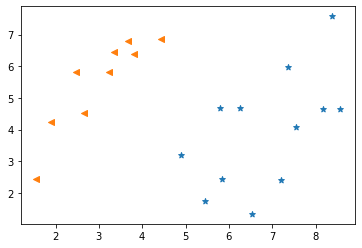

In [6]:
plt.scatter(
    dataset[dataset["label"] == 0]["x1"],
    dataset[dataset["label"] == 0]["x2"],
    marker="*",
)
plt.scatter(
    dataset[dataset["label"] == 1]["x1"],
    dataset[dataset["label"] == 1]["x2"],
    marker="<",
)

<a id="model"></a>
## Training of the network

In [7]:
# Split into features and labels. Convert values at the end into
# matrix format
x_input = dataset[["x1", "x2"]].values
y_label = dataset[["label"]].values

In [8]:
# Building the Sequential model
model = Sequential()
model.add(Dense(units=50, input_dim=2, activation="relu"))
model.add(Dense(units=20, activation="relu"))
model.add(Dense(units=1, input_dim=2, activation="sigmoid"))

In [9]:
# Providing the training parameters using the compile method
model.compile(
    optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"]
)

In [10]:
# Inspecting the model configuration using the summary function
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                150       
_________________________________________________________________
dense_1 (Dense)              (None, 20)                1020      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 21        
Total params: 1,191
Trainable params: 1,191
Non-trainable params: 0
_________________________________________________________________


In [11]:
# Training the model by calling the fit() method
model.fit(x_input, y_label, epochs=1000)

Epoch 1/1000
1/1 [==============================] - 1s 524ms/step - loss: 0.6365 - accuracy: 0.5714
Epoch 2/1000
1/1 [==============================] - 0s 68ms/step - loss: 0.6143 - accuracy: 0.5714
Epoch 3/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.5948 - accuracy: 0.5714
Epoch 4/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.5778 - accuracy: 0.5714
Epoch 5/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.5622 - accuracy: 0.5714
Epoch 6/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.5472 - accuracy: 0.5714
Epoch 7/1000
1/1 [==============================] - 0s 233ms/step - loss: 0.5328 - accuracy: 0.6667
Epoch 8/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.5187 - accuracy: 0.6667
Epoch 9/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.5049 - accuracy: 0.7619
Epoch 10/1000
1/1 [==============================] - 0s 20ms/step - loss: 0.4914 - accuracy: 0.8571
Epoch 11/100

<a id="statistics"></a>
## Statistics

In [12]:
# Evaluating the model's performance
model.evaluate(x_input, y_label)

1/1 [==============================] - 0s 335ms/step - loss: 3.3930e-04 - accuracy: 1.0000


[0.00033929929486475885, 1.0]